<a href="https://colab.research.google.com/github/Prathambiradr12345/Deep-Learning/blob/main/keras_Using_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
df=pd.read_csv('Admission_Predict.csv')

In [152]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [153]:
df.shape

(400, 9)

In [123]:
df.sample(8)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
249,250,321,111,3,3.5,4.0,8.83,1,0.77
170,171,312,101,2,2.5,3.5,8.04,1,0.68
262,263,308,103,2,2.5,4.0,8.36,1,0.70
211,212,328,110,4,5.0,4.0,9.14,1,0.82
82,83,320,110,5,5.0,4.5,9.22,1,0.92
58,59,300,99,1,3.0,2.0,6.80,1,0.36
200,201,317,103,3,2.5,3.0,8.54,1,0.73
163,164,317,105,3,3.5,3.0,8.56,0,0.68


In [154]:
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [155]:
df.drop('Serial No.',axis=1,inplace=True)

In [156]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [157]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [158]:
x=df.iloc[:,0:-1].values
y=df.iloc[:,-1].values

In [159]:
x

array([[337.  , 118.  ,   4.  , ...,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  , ...,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [330.  , 116.  ,   4.  , ...,   4.5 ,   9.45,   1.  ],
       [312.  , 103.  ,   3.  , ...,   4.  ,   8.78,   0.  ],
       [333.  , 117.  ,   4.  , ...,   4.  ,   9.66,   1.  ]])

In [160]:
y

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.65, 0.63, 0.62, 0.64, 0.7 ,
       0.94, 0.95, 0.97, 0.94, 0.76, 0.44, 0.46, 0.54, 0.65, 0.74, 0.91,
       0.9 , 0.94, 0.88, 0.64, 0.58, 0.52, 0.48, 0.46, 0.49, 0.53, 0.87,
       0.91, 0.88, 0.86, 0.89, 0.82, 0.78, 0.76, 0.56, 0.78, 0.72, 0.7 ,
       0.64, 0.64, 0.46, 0.36, 0.42, 0.48, 0.47, 0.54, 0.56, 0.52, 0.55,
       0.61, 0.57, 0.68, 0.78, 0.94, 0.96, 0.93, 0.84, 0.74, 0.72, 0.74,
       0.64, 0.44, 0.46, 0.5 , 0.96, 0.92, 0.92, 0.94, 0.76, 0.72, 0.66,
       0.64, 0.74, 0.64, 0.38, 0.34, 0.44, 0.36, 0.42, 0.48, 0.86, 0.9 ,
       0.79, 0.71, 0.64, 0.62, 0.57, 0.74, 0.69, 0.87, 0.91, 0.93, 0.68,
       0.61, 0.69, 0.62, 0.72, 0.59, 0.66, 0.56, 0.45, 0.47, 0.71, 0.94,
       0.94, 0.57, 0.61, 0.57, 0.64, 0.85, 0.78, 0.84, 0.92, 0.96, 0.77,
       0.71, 0.79, 0.89, 0.82, 0.76, 0.71, 0.8 , 0.78, 0.84, 0.9 , 0.92,
       0.97, 0.8 , 0.81, 0.75, 0.83, 0.96, 0.79, 0.

In [161]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
g=sc.fit_transform(x)

In [162]:
g

array([[ 1.76210664,  1.74697064,  0.79882862, ...,  1.16732114,
         1.76481828,  0.90911166],
       [ 0.62765641, -0.06763531,  0.79882862, ...,  1.16732114,
         0.45515126,  0.90911166],
       [-0.07046681, -0.56252785, -0.07660001, ...,  0.05293342,
        -1.00563118,  0.90911166],
       ...,
       [ 1.15124883,  1.41704229,  0.79882862, ...,  1.16732114,
         1.42900622,  0.90911166],
       [-0.41952842, -0.72749202, -0.07660001, ...,  0.61012728,
         0.30403584, -1.09997489],
       [ 1.41304503,  1.58200646,  0.79882862, ...,  0.61012728,
         1.78160888,  0.90911166]])

In [176]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(g,y,test_size=0.1,random_state=0)

In [177]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [178]:
model=Sequential()

In [179]:
x_train.shape

(360, 7)

In [180]:
model.add(Dense(7,activation='relu',input_dim=x_train.shape[1]))
model.add(Dense(7,activation='relu'))
#model.add(Dense(7,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

In [181]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_50 (Dense)                     │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 176 (704.00 B)

 Trainable params: 176 (704.00 B)

 Non-trainable params: 0 (0.00 B)

In [182]:
model.compile(optimizer='Adam',loss='mean_squared_error')

In [183]:
history=model.fit(x_train,y_train,epochs=100,batch_size=10,verbose=1,validation_split=0.2)

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.4791 - val_loss: 0.3005
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2613 - val_loss: 0.1711
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1328 - val_loss: 0.0910
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0882 - val_loss: 0.0593
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0591 - val_loss: 0.0476
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0450 - val_loss: 0.0397
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0365 - val_loss: 0.0335
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0316 - val_loss: 0.0293
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0315 - val_loss: 0.0245
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0231 - val_loss: 0.0224
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0191 - val_loss: 0.0195
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0

In [184]:
y_pred=model.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


In [185]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7071700703399082

In [186]:
history.history

{'loss': [0.39753782749176025,
  0.22535207867622375,
  0.12414104491472244,
  0.07178894430398941,
  0.05226552113890648,
  0.043030302971601486,
  0.03578928858041763,
  0.0302412249147892,
  0.026408499106764793,
  0.02262464538216591,
  0.019923442974686623,
  0.01756313443183899,
  0.015662530437111855,
  0.014097969979047775,
  0.012835731729865074,
  0.01180369034409523,
  0.011091329157352448,
  0.010114442557096481,
  0.00939856842160225,
  0.00883257295936346,
  0.008496205322444439,
  0.008075649850070477,
  0.007755698636174202,
  0.007432619575411081,
  0.007222222164273262,
  0.0070478906854987144,
  0.006788003724068403,
  0.006604714784771204,
  0.006344127468764782,
  0.006178566254675388,
  0.006097537465393543,
  0.005828308407217264,
  0.005725459661334753,
  0.005579817108809948,
  0.005560220684856176,
  0.005492873955518007,
  0.005378091242164373,
  0.005255591589957476,
  0.00549074774608016,
  0.005310959182679653,
  0.005111422855407,
  0.005238697398453951,


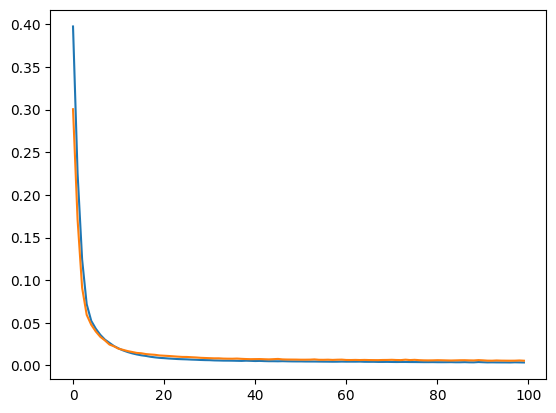

In [187]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])